Hold on... but with that we get an error! 

<span style="color:blue">**Question 1.0.1**</span> Try using one of the methods from last week to get rid of the column causing the problem, and use it to create a new table stored in the variable `new_houses_index`.

*Hint: read the error that Python gives you -- it might let you know which particular column that it doesn't like. Since we have this handy index column now, it makes sense to get rid of this one!

In [10]:
new_houses_index = houses_index.drop('New housing price indexes')# SOLUTION

This looks much more reasonable. In the process, it has also tidied up our x-axis. Although, it is not nearly as informative as it was (if we had been able to read it). What does index of 150 mean to us? 

<span style="color:blue">**Question 1.0.2**</span> Using the `np.arange()` that we saw last week and the table's `take()` can you select every 36th row so that we only have the entries of a January every 3 years. Use the 'New housing price indexes' column again so that we have a more informative x-axis.

Perform your operation on the original `houses` table, and store the new table in the variable `nice_houses`.
```
BEGIN QUESTION
name: q12
```

In [13]:
# houses.take(...)
nice_houses = houses.take(np.arange(0,252,36)) # SOLUTION

Wow, now that's a huge table! We don't need to work with all the information they give us there... so how about let's keep only the `Rank`, `Name`, `Platform`, `Year`, `Genre`, `Publisher`, and `Global_Sales` columns. 

<span style="color:blue">**Question 2.0.1**</span> Drop all the rest of the columns, and save that new table into a variable named `simple_video_games`, in the next cell.

*Hint: can you do this all in one function call, just with multiple arguments?*

``` 
BEGIN QUESTION
name: q21
```

In [17]:
simple_video_games = video_games.drop('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales') # SOLUTION

<span style="color:blue">**Question 2.0.2**</span> Now, we very clearly have some categorical data to work with in this table. Let's juxtapose the global sales of the 20 most popular video games. Before we go ahead and graph, let's create a new `top20_games` table to hold just the entries for said 20 video games.

*Hint: refer back to the Intro to Bar Charts video... there's two functions that will come in handy for exactly this!*

``` 
BEGIN QUESTION
name: q22
```

In [19]:
top20_games = simple_video_games.take(np.arange(20)) #SOLUTION

I think I still have an old copy of Wii Sports lying around in my basement somewheres... maybe once I'm done this assignment, I'll go bowling. 

I'm still a little curious though... I wonder what the global sales of the 20 least popular games in this data set looks like! 

<span style="color:blue">**Question 2.0.3**</span> Save the 20 least popular games in this data set into the variable `bottom20_games`. Your process should be very similar to the prior question... I'm positive you'll be able to **sort** it out. Use the `Rank` column in consideration of popularity.

``` 
BEGIN QUESTION
name: q23
```

In [23]:
simple_video_games = simple_video_games.sort("Rank", descending=True) # SOLUTION
bottom20_games = simple_video_games.take(np.arange(20)) # SOLUTION

<span style="color:blue">**Question 3.0.1**</span> There's a super handy method we can use to create a **distribution table**, showing the values of a variable, along with the frequency of each one. Use this method on our original `video_games` table to create a distribution table on the `Platform` column, saved into variable named `platform_distribution`. Leave the column name as `count`.

*Hint: take a look back at the Categorical Distributions video!*

``` 
BEGIN QUESTION
name: q31
```

In [27]:
platform_distribution = video_games.group('Platform') #SOLUTION

<span style="color:blue">**Question 3.0.2**</span> Let's plot this data in a number of different horizontal bar charts:
1. Plot the bottom 25% only (save the table in `smallest_platform`)
2. Plot the top 25% only (save the table in `biggest_platform`)
3. Plot the middle 50% (exclude the bottom and top 25%) (save the table in `mid_platform`)

*Hint* It might be helpful to find how large the dataset is, and where the 25% cutoff would be
``` 
BEGIN QUESTION
name: q32
```

In [50]:
total = platform_distribution.num_rows # SOLUTION NO PROMPT
cutoff = round(total/100*25) # SOLUTION NO PROMPT
biggest_platform = platform_distribution.sort("count", descending=True).take(np.arange(0,cutoff)) # SOLUTION
smallest_platform = platform_distribution.sort("count", descending=False).take(np.arange(0,cutoff)) # SOLUTION
mid_platform = platform_distribution.sort("count").take(np.arange(cutoff,total-cutoff)) # SOLUTION

<span style="color:blue">**Question 4.0.1**</span> Use the `with_column()` method to tack onto the `platform_distribution` table a column containing the total global sales for each game on that platform. You might find it easier to create a separate table for global sales first, and steal the column from that, to tack onto the `platform_distribution` table thereafter. Also, name the column the same title that gets autogenerated for you!

```
BEGIN QUESTION
name: q41
```

In [61]:

sales_by_platform = video_games.group("Platform", sum) # SOLUTION
platform_distribution = platform_distribution.with_column("Global_Sales sum", sales_by_platform.column('Global_Sales sum'))# SOLUTION

Now this is kind of neat, but remember, does this mean this is a useful representation of the data? We've got these points, but at first glance, have no clue which is which. What if it told us? Consult documentation to find a parameter to add labels!

<span style="color:blue">**Question 4.0.2**</span> Add labels to the plots!
```
BEGIN QUESTION
name: q42
manual: True
```

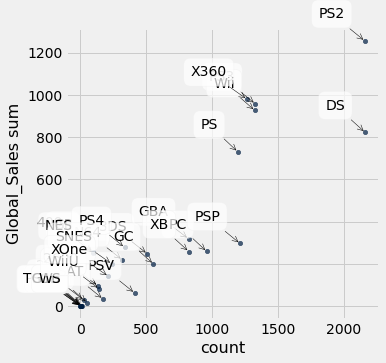

In [28]:
platform_distribution.scatter('count', 'Global_Sales sum', labels = "Platform") # SOLUTION